In [1]:
# Instale a biblioteca Pyoperon para Programação Genética
!pip install pyoperon

# Importe as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from pyoperon.sklearn import SymbolicRegressor
import pyoperon as po # veja no material da aula de Programação Genética

In [2]:

# Carregar o dataset de diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Dividindo os dados em conjunto de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


In [3]:
# Criando o modelo de Regressão Linear
linear_model = LinearRegression()

# Treinando o modelo
linear_model.fit(X_train, y_train)


# Fazendo previsões
y_pred_linear_train = linear_model.predict(X_train)
y_pred_linear_test = linear_model.predict(X_test)

# Calculando o MSE
mse_linear_train = mean_squared_error(y_train, y_pred_linear_train)
mse_linear_test = mean_squared_error(y_test, y_pred_linear_test)

# Calculando o R2
r2_linear_train = r2_score(y_train, y_pred_linear_train)
r2_linear_test = r2_score(y_test, y_pred_linear_test)

print(f"Regressão Linear - MSE Treino: {mse_linear_train}, MSE Teste: {mse_linear_test}")
print(f"Regressão Linearo - R2 Treino:{r2_linear_train}, R2 Teste: {r2_linear_test}")


Regressão Linear - MSE Treino: 2919.8967620259796, MSE Teste: 2679.103338139179
Regressão Linearo - R2 Treino:0.5150609833600455, R2 Teste: 0.5147055599033372


In [4]:
# Criando o modelo Árvore de Decisão
tree_model = DecisionTreeRegressor()

# Treinando o modelo
tree_model.fit(X_train, y_train)

# Criando previsões do modelo
y_pred_tree_train = tree_model.predict(X_train)
y_pred_tree_test = tree_model.predict(X_test)

# Calculando o MSE
mse_tree_train = mean_squared_error(y_train, y_pred_tree_train)
mse_tree_test = mean_squared_error(y_test, y_pred_tree_test)

# Calculando o R2
r2_tree_train = r2_score(y_train, y_pred_tree_train)
r2_tree_test = r2_score(y_test, y_pred_tree_test)

print(f"Árvore de Decisão - MSE Treino: {mse_tree_train}, MSE Teste: {mse_tree_test}")
print(f"Árvore de Decisão - R2 Treino:{r2_tree_train}, R2 Teste: {r2_tree_test}")

Árvore de Decisão - MSE Treino: 0.0, MSE Teste: 8007.146067415731
Árvore de Decisão - R2 Treino:1.0, R2 Teste: -0.4504194042241323


In [5]:
# Criando o modelo KNN
knn_model = KNeighborsRegressor()

# Treinando o modelo
knn_model.fit(X_train, y_train)

# Criando previsões do modelo
y_pred_knn_train = knn_model.predict(X_train)
y_pred_knn_test = knn_model.predict(X_test)

# Calculando o MSE
mse_knn_train = mean_squared_error(y_train, y_pred_knn_train)
mse_knn_test = mean_squared_error(y_test, y_pred_knn_test)

# Calculando o R2
r2_knn_train = r2_score(y_train, y_pred_knn_train)
r2_knn_test = r2_score(y_test, y_pred_knn_test)

print(f"KNN - MSE Treino: {mse_knn_train}, MSE Teste: {mse_knn_test}")
print(f"KNN - R2 Treino:{r2_knn_train}, R2 Teste: {r2_knn_test}")


KNN - MSE Treino: 2215.5509348441924, MSE Teste: 4069.3042696629213
KNN - R2 Treino:0.6320393564484814, R2 Teste: 0.2628837010442948


In [6]:
# Criando o modelo Random Forests
random_model = RandomForestRegressor()

# Treinando o modelo
random_model.fit(X_train, y_train)

# Criando previsões do modelo
y_pred_random_train = random_model.predict(X_train)
y_pred_random_test = random_model.predict(X_test)

# Calculando o MSE
mse_random_train = mean_squared_error(y_train, y_pred_random_train)
mse_random_test = mean_squared_error(y_test, y_pred_random_test)

# Calculando o R2
r2_random_train = r2_score(y_train, y_pred_random_train)
r2_random_test = r2_score(y_test, y_pred_random_test)

print(f"KNN - MSE Treino: {mse_random_train}, MSE Teste: {mse_random_test}")
print(f"KNN - R2 Treino:{r2_random_train}, R2 Teste: {r2_random_test}")


KNN - MSE Treino: 493.7946209631728, MSE Teste: 3345.2477764044947
KNN - R2 Treino:0.9179901560129715, R2 Teste: 0.39403974325140856


In [7]:
# Criando o modelo Programação Genética - Pyoperon
pg = SymbolicRegressor(crossover_probability=0.95,
                       mutation_probability=0.25,
                       max_evaluations=1000,
                       generations=1000,
                       population_size=1000,
                       allowed_symbols = 'add,sub,mul,pow,div,constant,variable',
                       objectives=['r2'])

# Treinando o modelo
pg.fit(X_train, y_train)

# Calculando o R2
print(r2_score(y_train, pg.predict(X_train)))

0.4070516069283836


In [8]:
# Definindo o número de folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

def evaluate_model_kfold(model, X, y):
    mse_scores = []
    r2_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Treinando o modelo
        model.fit(X_train, y_train)

        # Fazendo previsões e calculando o MSE
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred) # Calculate R2 for this fold
        r2_scores.append(r2) # Append R2 to the list

    return np.mean(mse_scores), np.std(mse_scores),np.mean(r2_scores)

# Aplicando o K-Fold para cada modelo
# The models dictionary should contain the actual models, not the R2 scores.
models = {
    "Regressão Linear": linear_model,
    "Árvore de Decisão": tree_model,
    "KNN": knn_model,
    "Random Forests": random_model,
    "Programação Genética": pg
}

for model_name, model in models.items():
    mean_mse, std_mse, mean_r2 = evaluate_model_kfold(model, X, y)
    print(f"{model_name} - MSE Médio: {mean_mse}, Desvio Padrão: {std_mse}")
    # lembre-se de criar a métrica R2 para todos os modelos.
    print(f"{model_name} - R2 Médio: {mean_r2}")

Regressão Linear - MSE Médio: 3023.6568282792787, Desvio Padrão: 408.60659088926303
Regressão Linear - R2 Médio: 0.4648921045075478
Árvore de Decisão - MSE Médio: 7359.314444444443, Desvio Padrão: 1604.688928914485
Árvore de Decisão - R2 Médio: -0.3015052436176736
KNN - MSE Médio: 3731.806101010101, Desvio Padrão: 578.0183236824253
KNN - R2 Médio: 0.349863876466016
Random Forests - MSE Médio: 3409.1635267777783, Desvio Padrão: 654.1661182895922
Random Forests - R2 Médio: 0.39934575974005593
Programação Genética - MSE Médio: 3622.663587636408, Desvio Padrão: 362.93352391873225
Programação Genética - R2 Médio: 0.3601758312836555


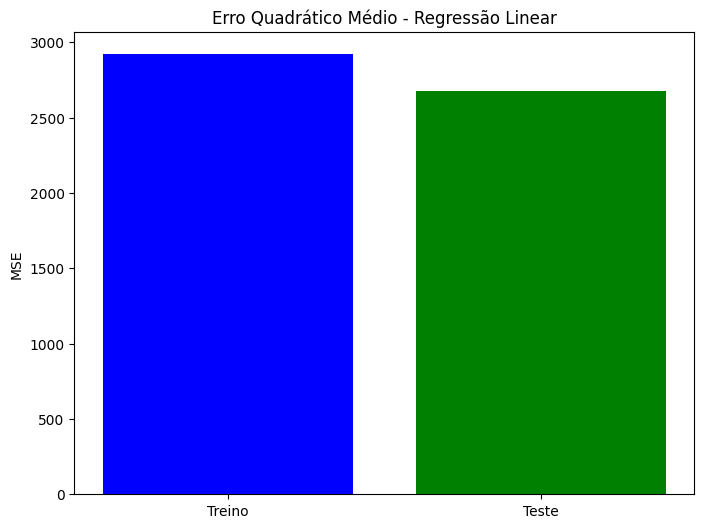

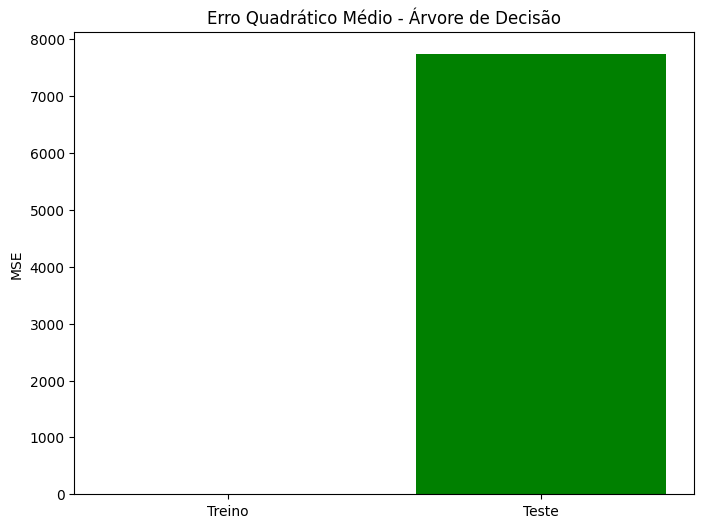

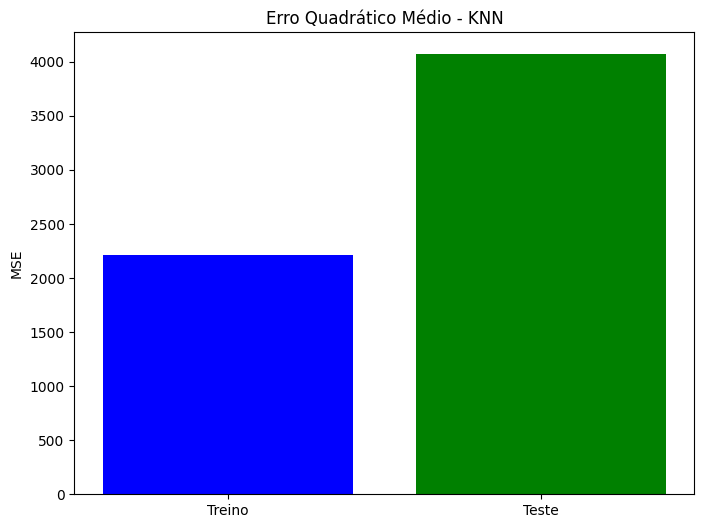

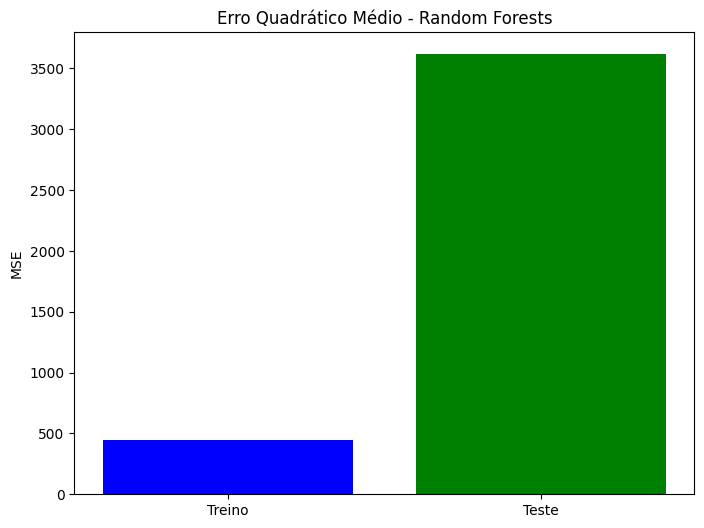

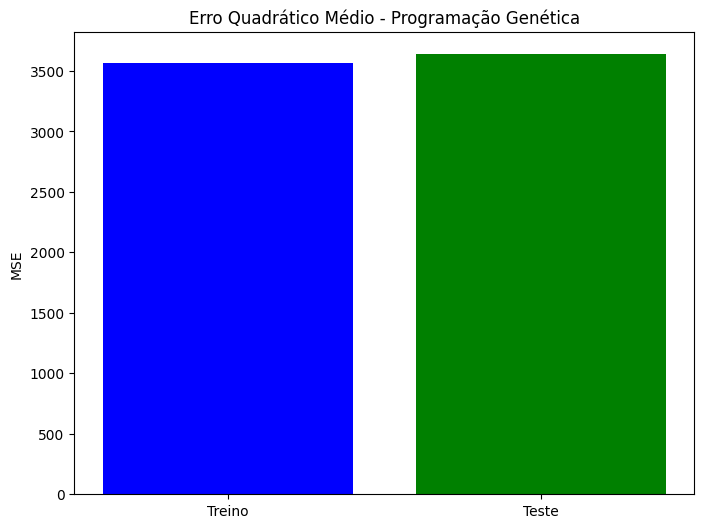

In [9]:
# Gerando gráficos de comparação
def plot_results(mse_train, mse_test, model_name):
    plt.figure(figsize=(8, 6))
    plt.bar(['Treino', 'Teste'], [mse_train, mse_test], color=['blue', 'green'])
    plt.title(f'Erro Quadrático Médio - {model_name}')
    plt.ylabel('MSE')
    plt.show()

# Para cada modelo
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    plot_results(mse_train, mse_test, model_name)